In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[1234].shape

(28, 28)

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[1234].shape

(28, 28, 1)

In [7]:
X = x_train[1234]

In [8]:
X = X.reshape(28, 28)

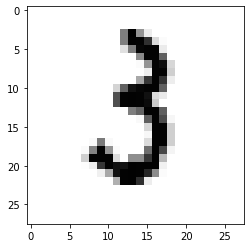

In [9]:
plt.imshow(X,  cmap='Greys')

In [10]:
y_train[1234]

3

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [18]:
model.add(MaxPool2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(8, (5, 5), padding='same',
                activation='relu'))

In [20]:
model.add(MaxPool2D(pool_size=(2,2)))

In [21]:
model.add(Conv2D(16, (5, 5), padding='same',
                activation='relu'))

In [22]:
model.add(MaxPool2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())
model.add(Dense(20, activation='relu'))

In [25]:

model.add(Dense(20, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [29]:
model.fit(x_train, y_train, batch_size=100, epochs=20)



Epoch 1/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0899 - acc: 0.0990
Epoch 2/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0896 - acc: 0.1131
Epoch 3/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0888 - acc: 0.1580
Epoch 4/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0858 - acc: 0.2590
Epoch 5/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0636 - acc: 0.5140
Epoch 6/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.0399 - acc: 0.7212
Epoch 7/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0305 - acc: 0.7877
Epoch 8/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.0266 - acc: 0.8130
Epoch 9/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0243 - acc: 0.8292
Epoch 10/20
60000/60000 [==============================] - 16s 271us/step - loss